In [1]:
RA=211.181999999333
DEC=-14.9809999994415
coords=str(RA)+' '+str(DEC)

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy.table import Table
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import pandas as pd

In [3]:
obs_table = Observations.query_region(coords,radius=5*u.arcsec)
print(obs_table[10:11])

intentType obs_collection provenance_name ... srcDen    obsid    distance
---------- -------------- --------------- ... ------ ----------- --------
   science           HLSP           K2SFF ...    nan 18001872655      0.0


In [4]:
obsid1 = '18001872655'
data_products = Observations.get_product_list(obsid1)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_correction.png with expected size 12934. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png with expected size 6842. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png with expected size 3462. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_skypos.png with expected size 7285. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png with expected size 28993. [astroquery

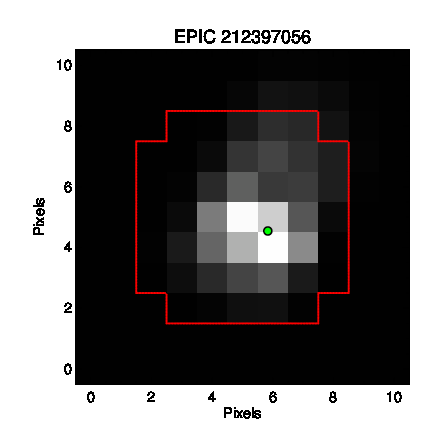

In [5]:
from IPython.display import Image
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png')

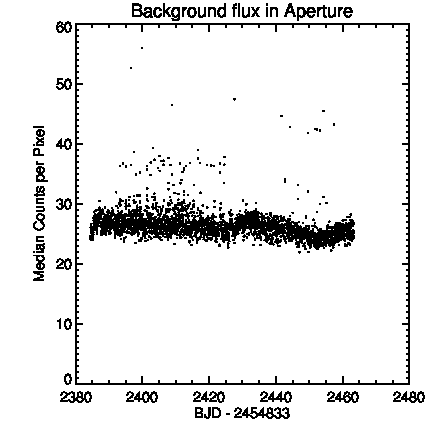

In [6]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png')

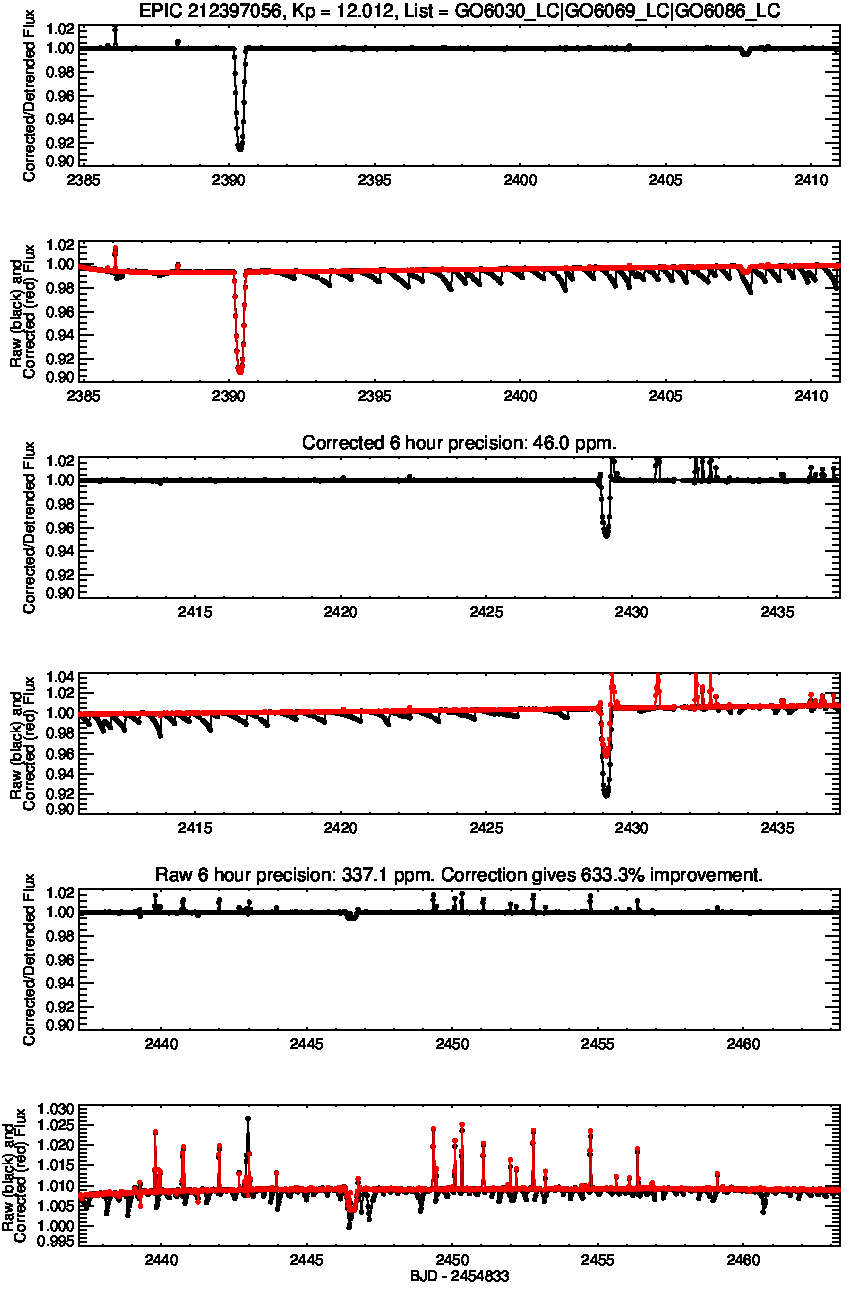

In [7]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png')

In [8]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200812 21:34:15 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200812 21:34:15 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


[I 200812 21:34:15 utils:141] NumExpr defaulting to 6 threads.


Text(0, 0.5, 'Flux')

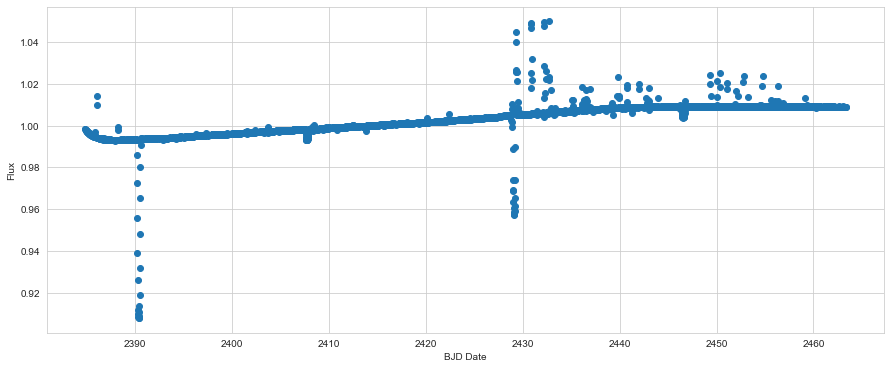

In [9]:
%matplotlib inline 
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))

df=pd.read_csv('mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None,names=['times','fluxes','extra'])
df['errs']=df['fluxes']*0.01
df=df.drop(columns=['extra'])
dates=df['times'].to_numpy()
fluxes=df['fluxes'].to_numpy()
errs=df['errs'].to_numpy()

plt.scatter(dates,fluxes)
plt.xlabel('BJD Date')
plt.ylabel('Flux')

In [10]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs,magsarefluxes=True)

[I 200812 21:34:16 zgls:597] using autofreq with 3920 frequency points, start P = 0.100, end P = 78.499
[I 200812 21:34:16 zgls:607] using 6 workers...


In [11]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200812 21:34:19 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.58023, reduced chisq = 0.04401
[I 200812 21:34:19 png:696] plotting phased LC with period 78.499265, epoch 2389.26550
[I 200812 21:34:19 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200812 21:34:19 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200812 21:34:19 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.73424, reduced chisq = 0.04404
[I 200812 21:34:19 png:696] plotting phased LC with period 156.998530, epoch 2389.10204
[I 200812 21:34:19 nonphysical:216] spline fit done. nknots = 30,  chisq = 820.34369, reduced chisq = 0.24128
[I 200812 21:34:19 png:696] plotting phased LC with period 65.416054, epoch 2400.03330
[I 200812 21:34:19 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200812 21:34:19 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200812 21

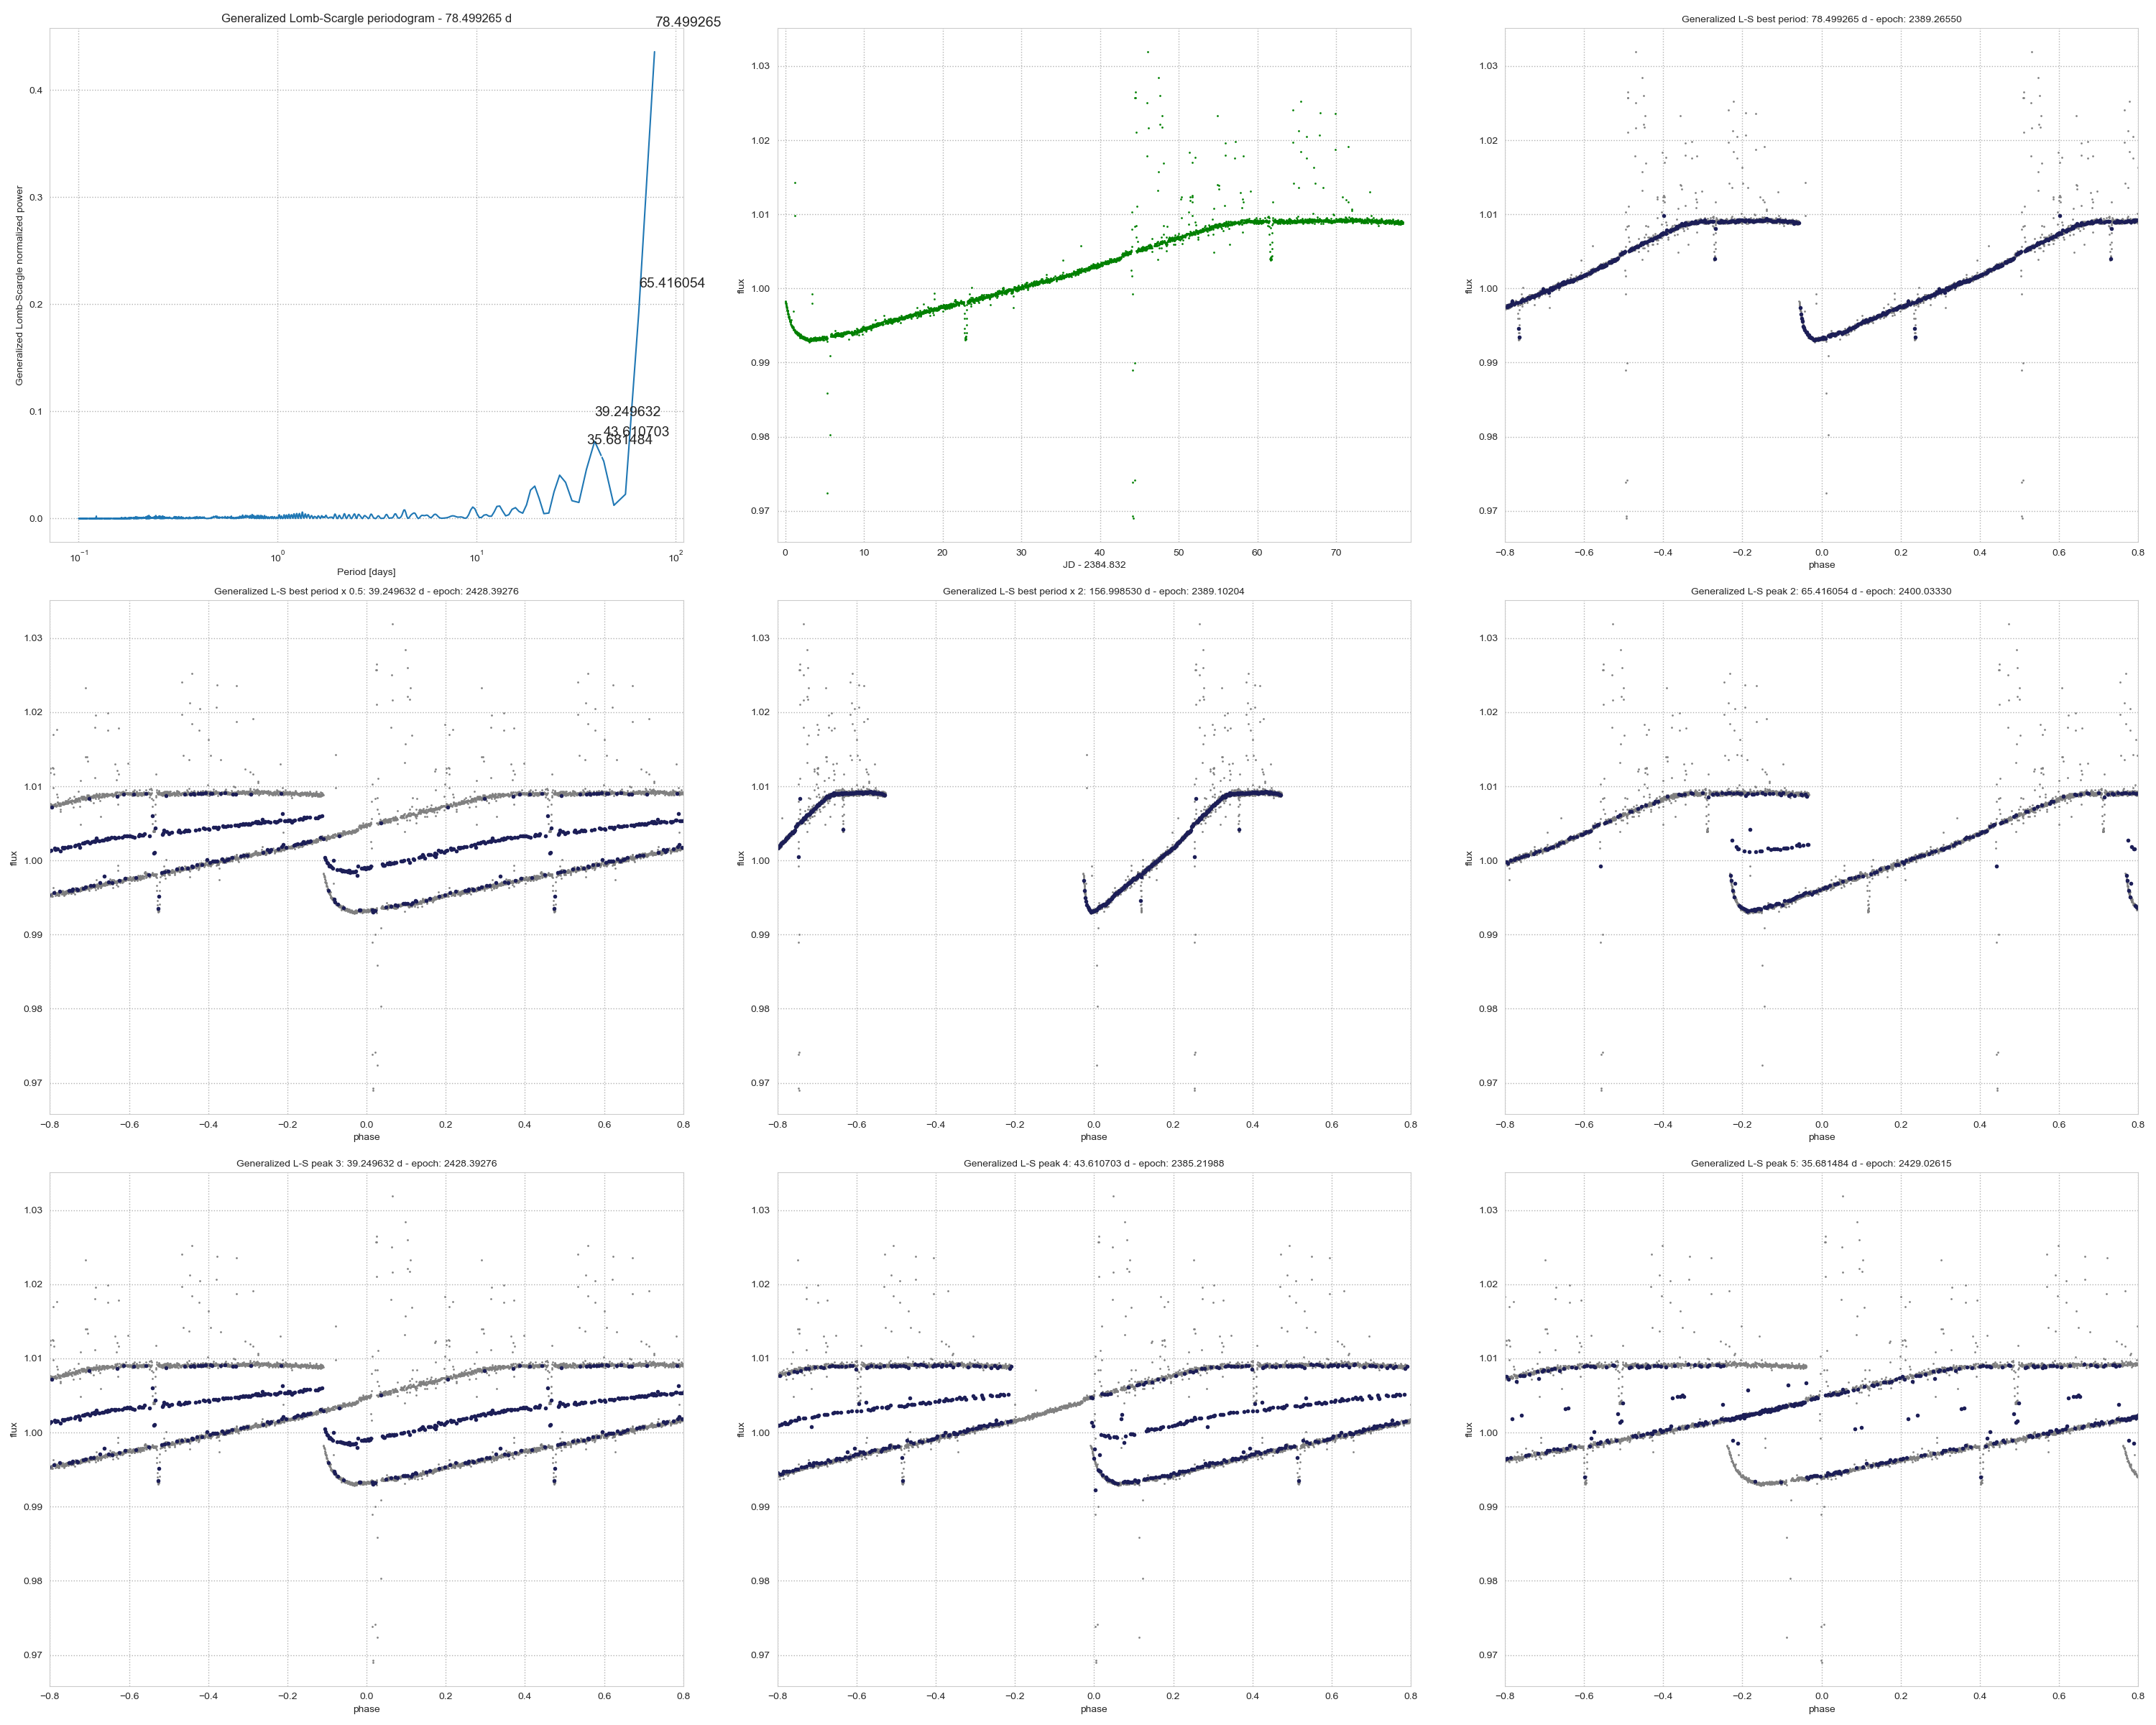

In [12]:
Image('glsp-checkplot.png')

In [13]:
glsp

{'bestperiod': 78.49926481800048,
 'bestlspval': 0.43568429752245735,
 'nbestpeaks': 5,
 'nbestlspvals': [0.43568429752245735,
  0.19260914052767195,
  0.07211334668212753,
  0.05353514012508494,
  0.04581702665631937],
 'nbestperiods': [78.49926481800048,
  65.4160540150004,
  39.24963240900024,
  43.61070267666694,
  35.68148400818203],
 'lspvals': array([4.35684298e-01, 1.92609141e-01, 2.27039012e-02, ...,
        5.92159088e-05, 8.98459385e-05, 1.06964430e-04]),
 'omegas': array([ 0.08004133,  0.09604959,  0.11205786, ..., 62.78441673,
        62.80042499, 62.81643326]),
 'periods': array([78.49926482, 65.41605402, 56.07090344, ...,  0.10007555,
         0.10005004,  0.10002455]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [14]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [78.49926481800048, 65.4160540150004, 39.24963240900024, 43.61070267666694, 35.68148400818203] (days)


In [15]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs, magsarefluxes=True)

[I 200812 21:34:21 abls:919] min P: 0.1, max P: 100.0, nfreq: 313684, minfreq: 0.01, maxfreq: 10.0
[I 200812 21:34:21 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 3.184743202113061e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200812 21:34:21 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 78.499,  will make minfreq = 2 x 1/timebase
[W 200812 21:34:21 abls:969] new minfreq: 0.025477945616904488, maxfreq: 10.0
[I 200812 21:34:21 abls:980] using 6 workers...
[I 200812 21:34:21 abls:1090] worker 1: minfreq = 0.025478, nfreqs = 52280
[I 200812 21:34:21 abls:1090] worker 2: minfreq = 1.690462, nfreqs = 52280
[I 200812 21:34:21 abls:1090] worker 3: minfreq = 3.355445, nfreqs = 52280
[I 200812 21:34:21 abls:1090] worker 4: minfreq = 5.020429, nfreqs = 52280
[I 200812 21:34:21 abls:1090] worker 5: minfreq = 6.685413, nfreqs = 52280
[I 200812 21:34:21 abls:1090] worker 6: minfreq = 8.350397, nfre

In [16]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs, magsarefluxes=True)

[I 200812 21:35:02 nonphysical:216] spline fit done. nknots = 30,  chisq = 1134.96024, reduced chisq = 0.33381
[I 200812 21:35:02 png:696] plotting phased LC with period 38.717270, epoch 2428.82183
[I 200812 21:35:02 nonphysical:216] spline fit done. nknots = 30,  chisq = 1263.52871, reduced chisq = 0.37163
[I 200812 21:35:02 png:696] plotting phased LC with period 19.358635, epoch 2427.41204
[I 200812 21:35:02 nonphysical:216] spline fit done. nknots = 30,  chisq = 192.73955, reduced chisq = 0.05669
[I 200812 21:35:02 png:696] plotting phased LC with period 77.434540, epoch 2388.85685
[I 200812 21:35:02 nonphysical:216] spline fit done. nknots = 30,  chisq = 1263.52871, reduced chisq = 0.37163
[I 200812 21:35:02 png:696] plotting phased LC with period 19.358635, epoch 2427.41204
[I 200812 21:35:02 nonphysical:216] spline fit done. nknots = 30,  chisq = 1292.17161, reduced chisq = 0.38005
[I 200812 21:35:02 png:696] plotting phased LC with period 23.362876, epoch 2417.48220
[I 200812 2

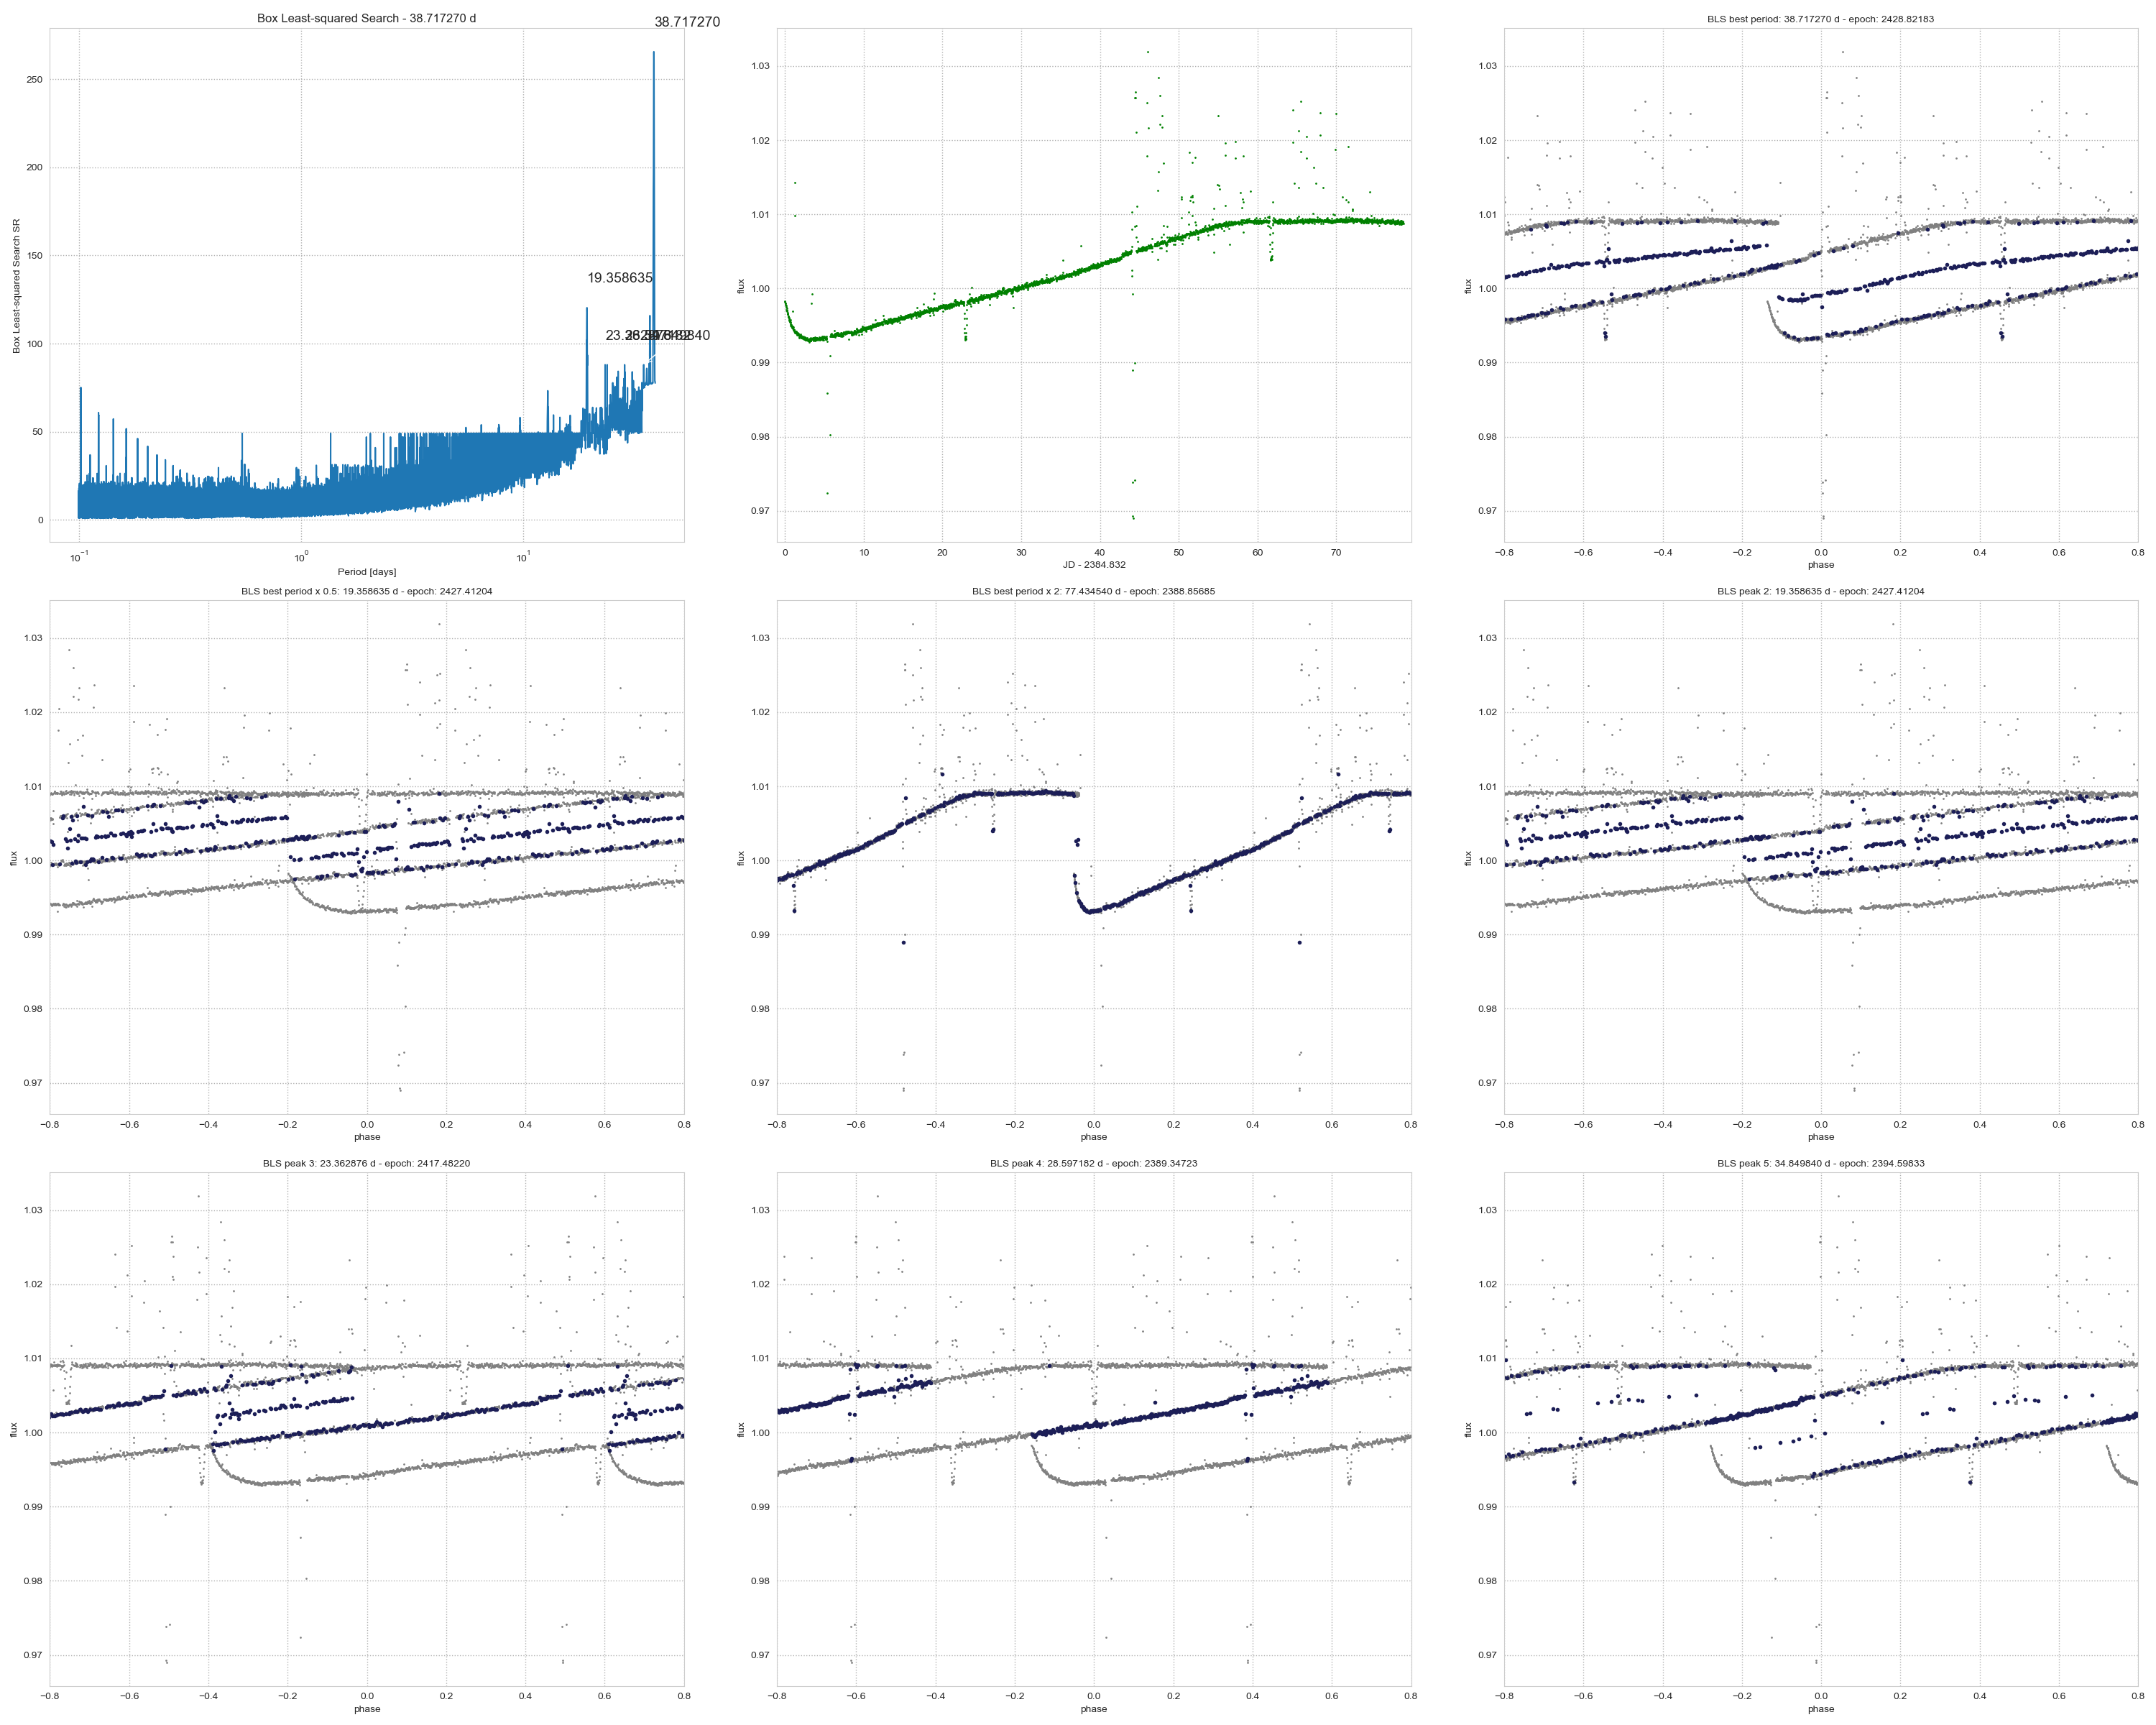

In [17]:
Image('bls-checkplot.png')

In [18]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs, magsarefluxes=True)

[I 200812 21:35:04 spdm:337] using autofreq with 3920 frequency points, start P = 0.100, end P = 78.499
[I 200812 21:35:04 spdm:349] using 6 workers...


In [19]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs, magsarefluxes=True)

[I 200812 21:35:07 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.58023, reduced chisq = 0.04401
[I 200812 21:35:07 png:696] plotting phased LC with period 78.499265, epoch 2389.26550
[I 200812 21:35:08 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200812 21:35:08 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200812 21:35:08 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.73424, reduced chisq = 0.04404
[I 200812 21:35:08 png:696] plotting phased LC with period 156.998530, epoch 2389.10204
[I 200812 21:35:08 nonphysical:216] spline fit done. nknots = 30,  chisq = 234.67176, reduced chisq = 0.06902
[I 200812 21:35:08 png:696] plotting phased LC with period 0.102133, epoch 2393.78104
[I 200812 21:35:08 nonphysical:216] spline fit done. nknots = 30,  chisq = 172.37727, reduced chisq = 0.05070
[I 200812 21:35:08 png:696] plotting phased LC with period 0.122617, epoch 2388.99988
[I 200812 21:35

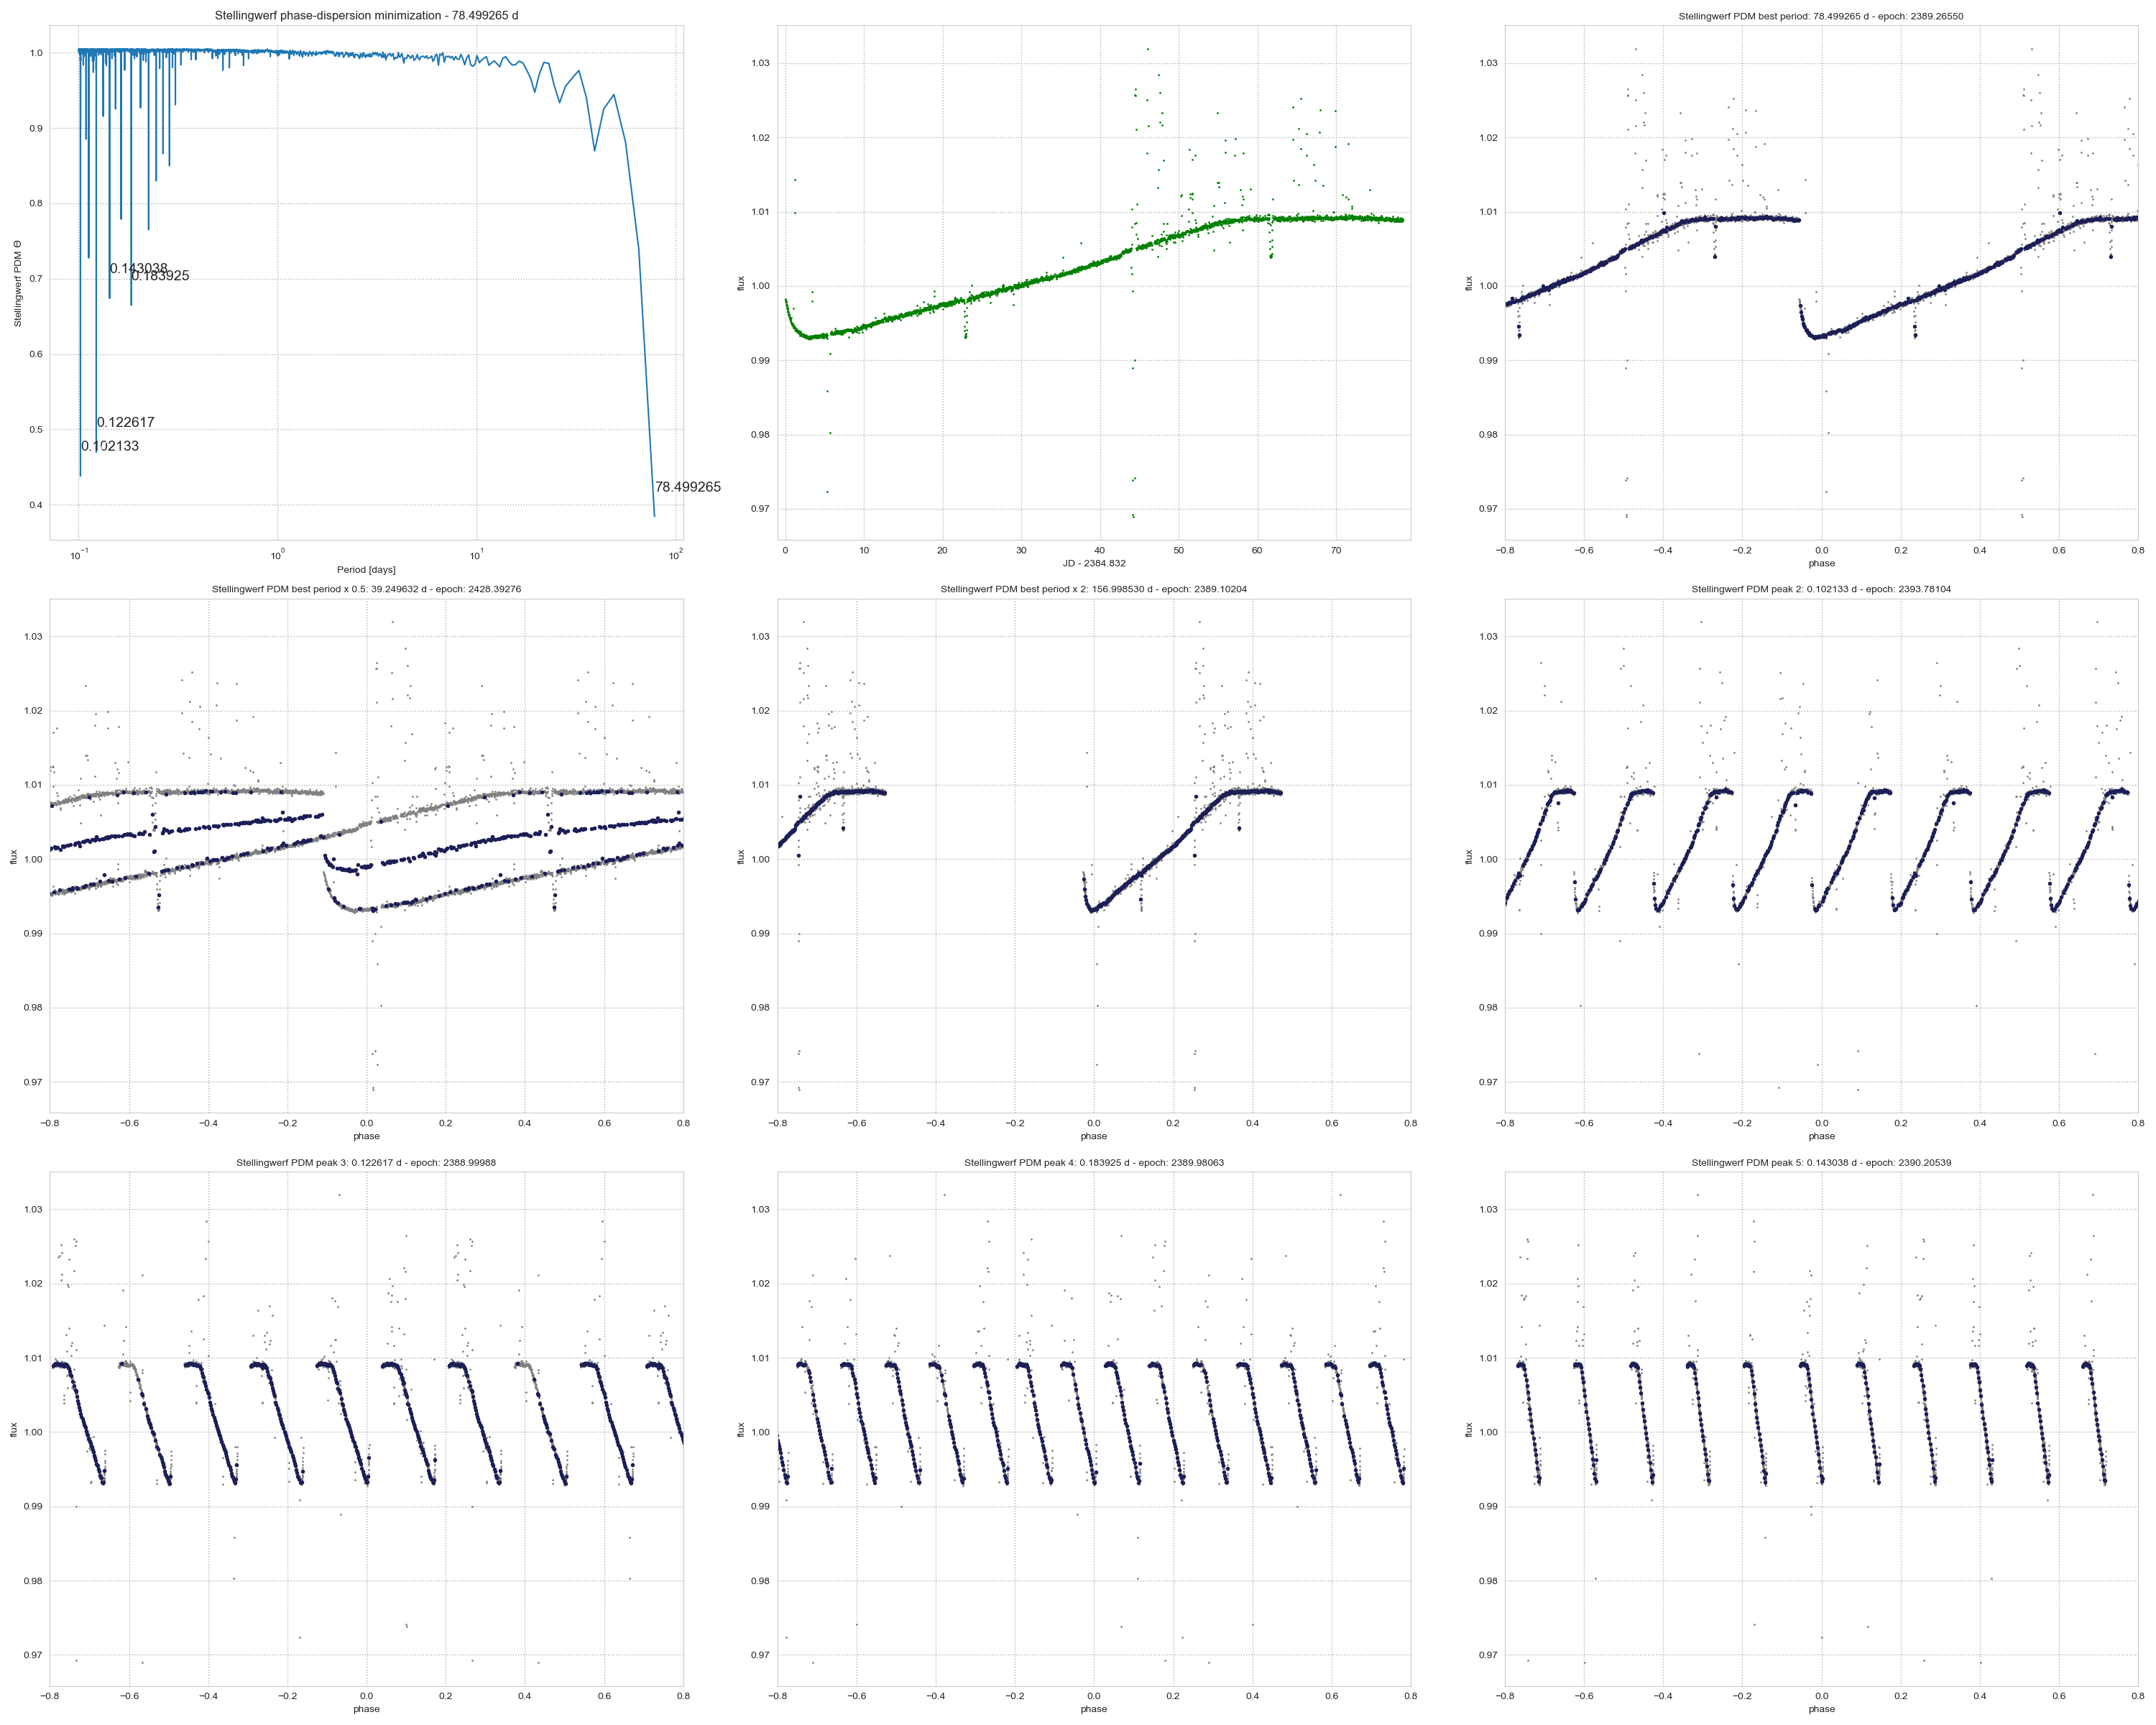

In [20]:
Image('spdm-checkplot.png')

In [21]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [78.49926481800048, 0.10213279315378672, 0.12261678353327159, 0.1839251752999074, 0.143038018983237] (days)


In [22]:
fileout='EPIC_212397056.pkl'
cpf = checkplot.checkplot_pickle([glsp,spdm,bls],dates,fluxes,errs,magsarefluxes=True,\
                                 outfile=fileout,objectinfo={'ra': RA,'decl': DEC})

[W 200812 21:35:10 pkl:604] adding a randomly generated objectid since none was provided in objectinfo dict
[I 200812 21:35:10 pkl_utils:415] adding in object information and finder chart for 6e665 at RA: 211.182, DEC: -14.981
[I 200812 21:35:12 skyview:209] submitting stamp request for 211.1820, -14.9810, DSS2 Red, Linear, 300
[I 200812 21:35:15 skyview:233] getting https://skyview.gsfc.nasa.gov/tempspace/fits/skv26141199668025.fits
[I 200812 21:35:18 plotbase:964] fetched stamp successfully for (211.182, -14.981)
[W 200812 21:35:22 pkl_utils:765] pmRA not found in provided objectinfo dict, using value from GAIA
[W 200812 21:35:22 pkl_utils:783] pmDEC not found in provided objectinfo dict, using value from GAIA
[I 200812 21:35:25 mast:245] query successful. nmatches: 1
[I 200812 21:35:29 pkl:677] sigclip = 4.0: before = 3463 observations, after = 3431 observations
[I 200812 21:35:29 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.58023, reduced chisq = 0.04401
[I 200812 21

[I 200812 21:35:44 pkl_png:1076] checkplot pickle -> checkplot PNG: checkplot-pickle.png OK


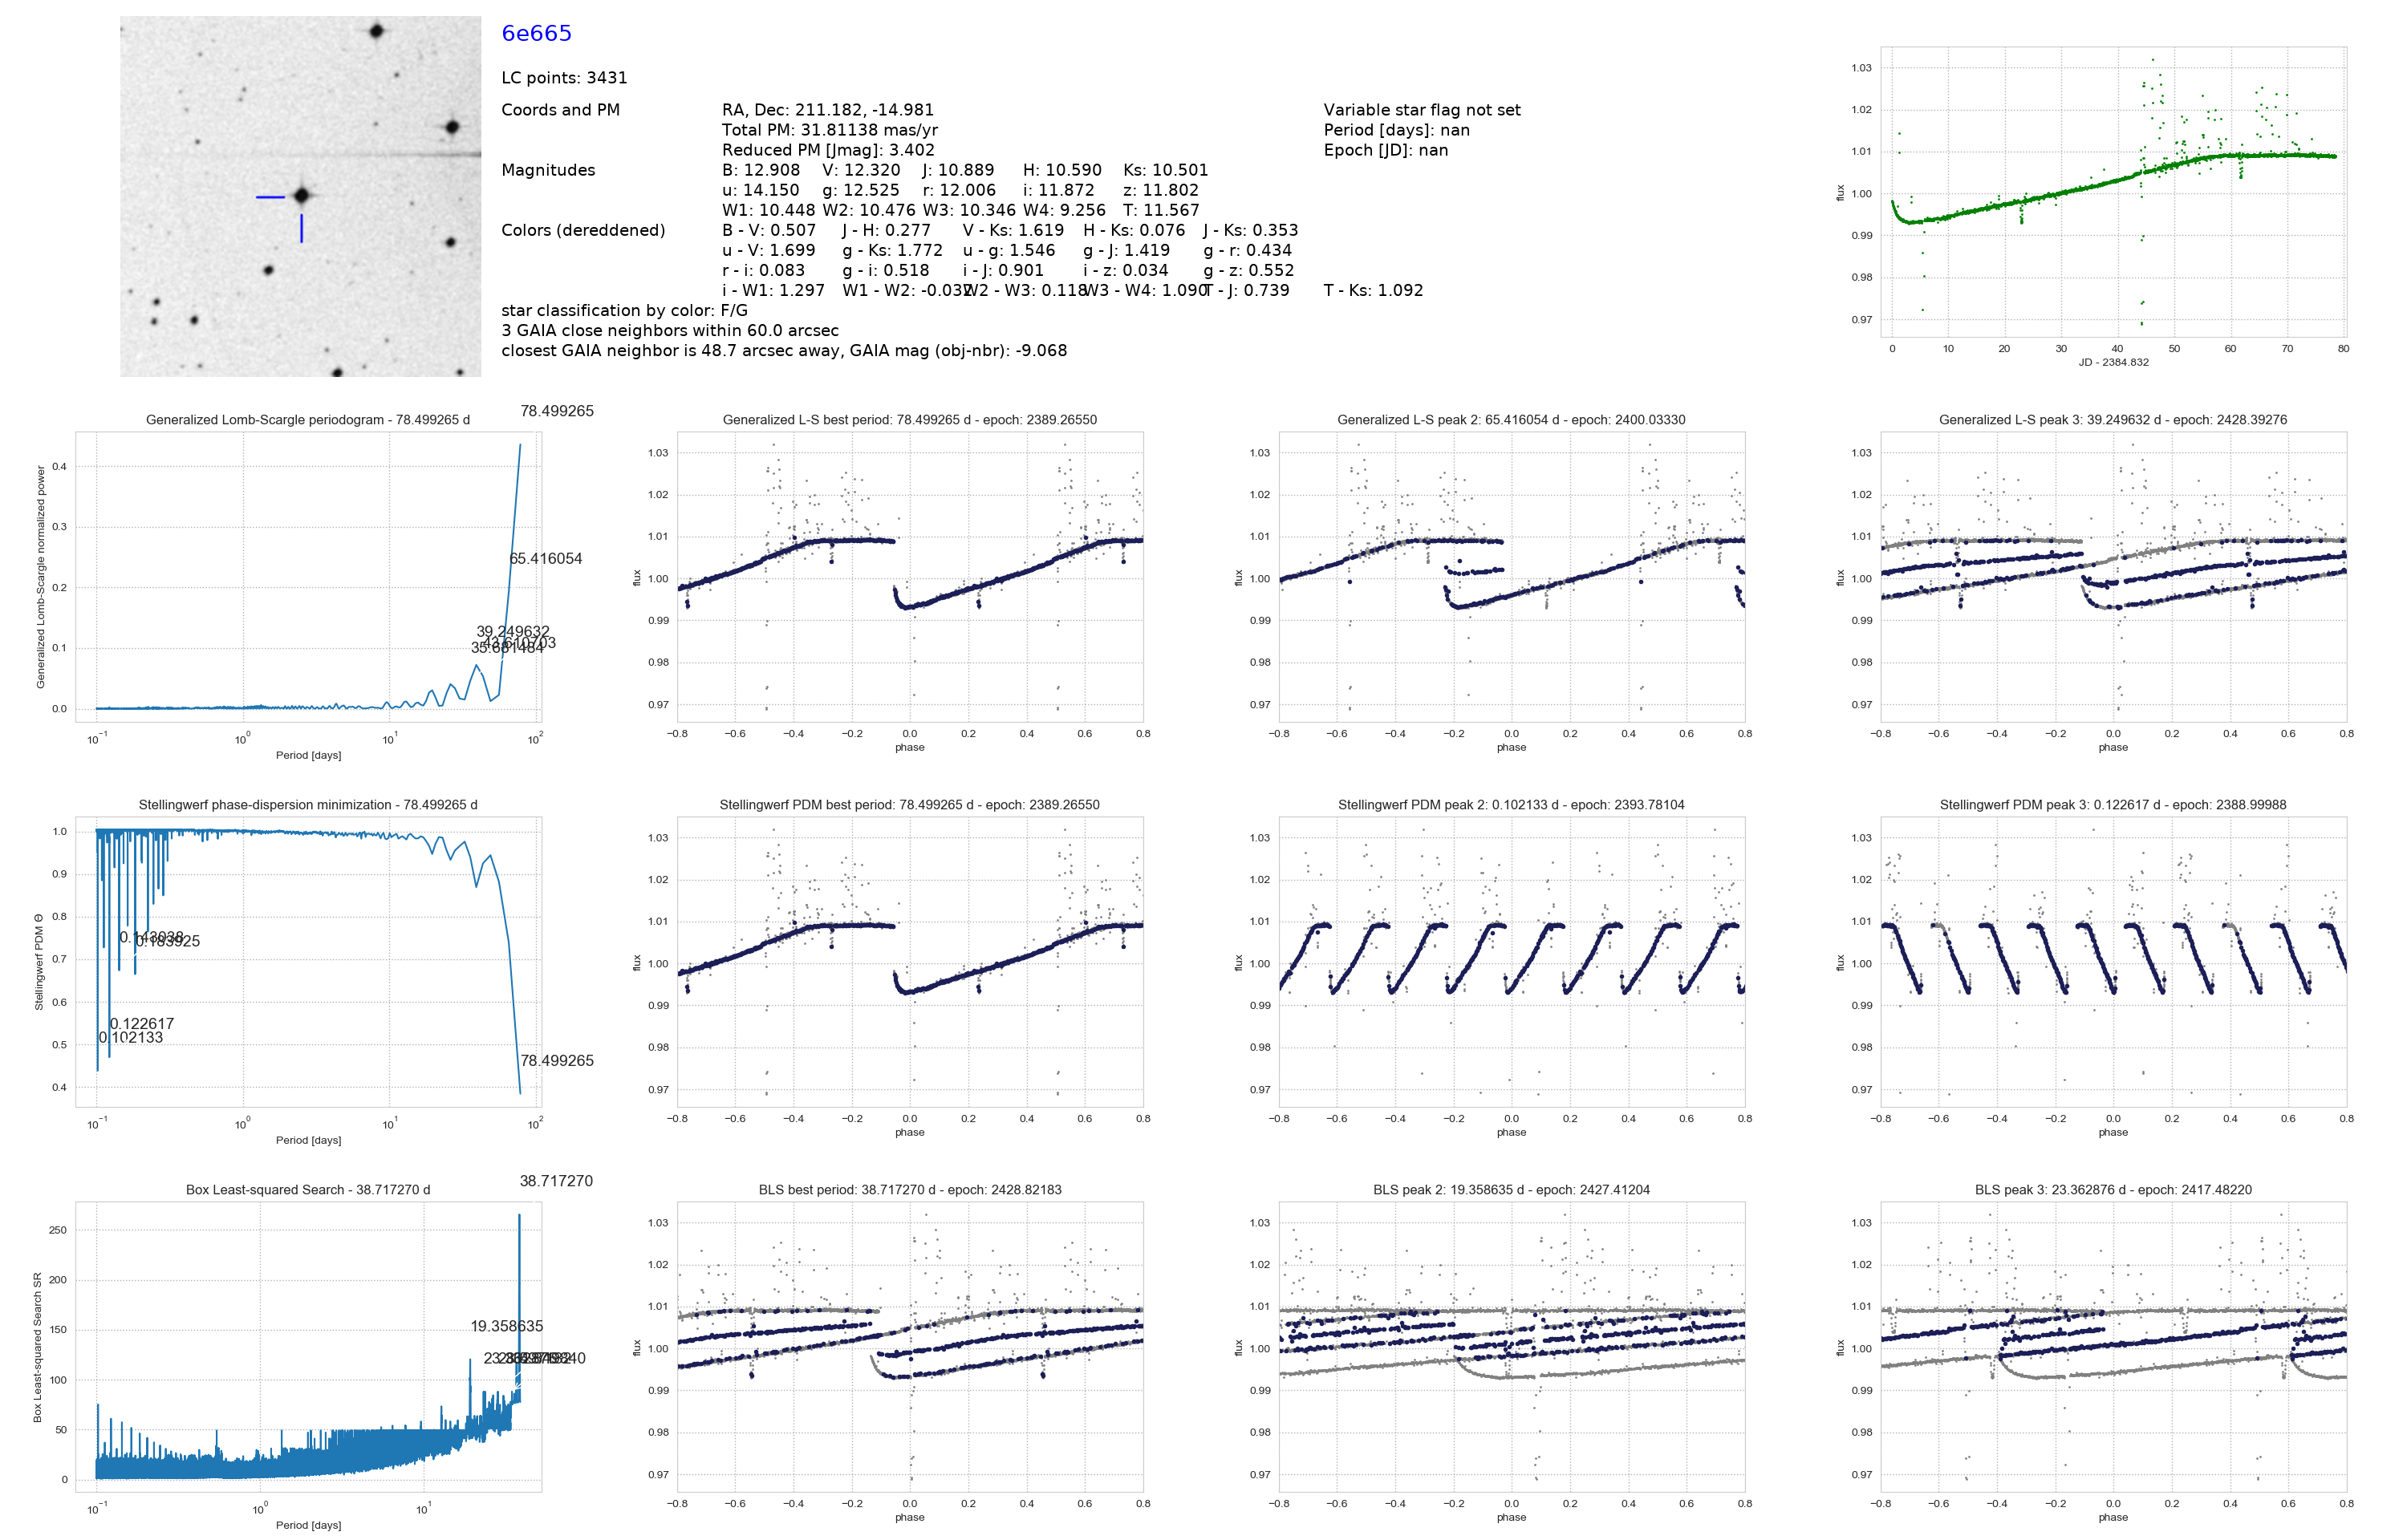

In [23]:
cpfpng = checkplot.checkplot_pickle_to_png(fileout, 'checkplot-pickle.png')
Image('checkplot-pickle.png')